In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os 

In [4]:
os.getcwd()

'C:\\Users\\maracrasava\\Desktop\\Projects\\Machine learning\\Neural Network\\Musical Instrument Recognition'

In [5]:
os.chdir("D:")

In [6]:
training_path = os.path.join(os.getcwd(), 'IRMAS-TrainingData')
print(training_path)

D:\IRMAS-TrainingData


In [7]:
testing_path = os.path.join(os.getcwd(),'IRMAS-TestingData-Part1' )
print(testing_path)

D:\IRMAS-TestingData-Part1


In [28]:
# Training data

import librosa

path = []
instruments = ['cel', 'cla','flu','gac','gel','org','pia','sax','tru','vio','voi']
# os.remove(os.path.join(training_path, 'README.txt'))

for i in instruments:
    instrument_folder = os.path.join(training_path, i)
    labels = instruments.index(i)
    for audio in os.listdir(instrument_folder):
        try:
            path.append(os.path.join(instrument_folder, audio))
            y.append(labels)
        except Exception as e:
            pass
X = []
y = []

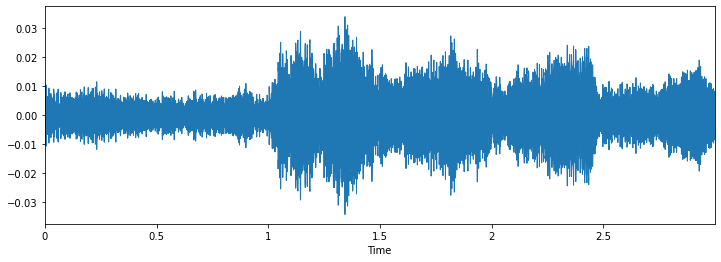

In [33]:
import librosa.display
wave, sr = librosa.load(path[0], mono=True)
plt.figure(figsize=(12,4))
librosa.display.waveplot(wave, sr=sr)

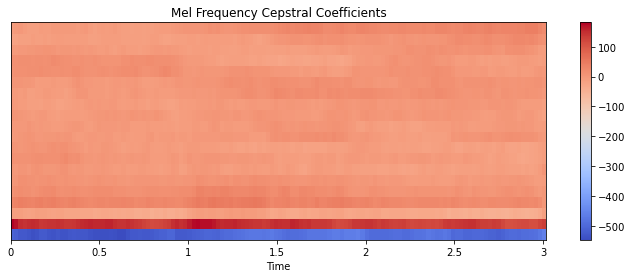

In [35]:
# Converting to Mel Frequency

mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc = 20)
plt.figure(figsize=(12,4))
plt.title("Mel Frequency Cepstral Coefficients")
librosa.display.specshow(mfccs, x_axis ="time")
plt.colorbar()

In [38]:
# 2D array

mfccs.shape

(20, 130)

In [47]:
# Labelling as one hot vector

LABEL_TO_INDEX = {'cel':0, 'cla':1, 'flu':2, 'gac':3, 'gel':4, 'org':5, 'pia':6, 'sax':7, 'tru':8, 'vio':9, 'voi':10} 
_, labels = os.path.split(os.path.dirname(path[0]))

encoding = [0] * len(LABEL_TO_INDEX)
encoding[LABEL_TO_INDEX[labels]] = 1
print(f"Audio path:{path[0]}")
print(f"Label:{labels}")
print(f"One hot:{encoding}")

Audio path:D:\IRMAS-TrainingData\cel\008__[cel][nod][cla]0058__1.wav
Label:cel
One hot:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [54]:
BATCH_SIZE = 100
ITERATIONS = 500
ITERATIONS_TEST = 10
EVAL_EVERY = 5
HEIGHT = 20
WIDTH = 44
NUM_LABELS = 0
LABEL_TO_INDEX_MAP = {}

In [55]:
def labelling(path):
    labels = os.listdir(path)
    index = 0
    for label in labels:
        LABEL_TO_INDEX_MAP[label] = index
        index += 1
        NUM_LABELS = len(LABEL_TO_INDEX_MAP)

In [56]:
def one_hot(label):
    encoding = [0] * len(LABEL_TO_INDEX_MAP)
    encoding[LABEL_TO_INDEX_MAP[label]] = 1
    return encoding


In [57]:
def mffc_get(wave_path, PAD_WIDTH = WIDTH):
    wave, sr = librosa.load(wave_path, mono=True)
    mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc = HEIGHT)
    mfccs = np.pad(mfccs, ((0,0), (0, PAD_WIDTH -len(mfccs[0]))), mode="constant")
    return mfccs

In [60]:
def get_data(batch_size, path):
    X = []
    y = []
    random.seed(1234)
    path = os.path.join(path, "*.wav")
    while True:
        random.shuffle(path)
        for wave_path in path:
            _,label = os.path.split(os.path.dirname(wave_path))
            X.append(get_mfcc(path))
            y.append(one_hot(label))
            if(len(X)==batch_size):
                yield X,y
                X=[]
                y=[]

In [62]:
def get_model(input, dropout):
    # Convolutional1
        # Relu
        # Dropout
        # Max Pool
    # Convolutional2
        # Relu
        # Dropout
    # Dense
        # Mat Mul
        
    
    # First layer
    with tf.name_scope("Conv1"):
        input_4d = tf.reshape(input, [-1, HEIGHT, WEIGHT, 1])
        w1 = tf.Variable(tf.truncated_normal([12,8,1,44], stddev=0.01), name="W")
        b1 = tf.Variable(tf.zeros([44]), name="B")
        conv1 = tf.nn.conv2d(input_4d, w1, strides=[1,1,1,1],padding='SAME')
        act1= tf.nn.relu(conv1+b1)
        drop1 = tf.nn.dropout(act1, dropout)
        max_pool = tf.nn.max_pool(drop1, ksize[1,2,2,1], strides=[2,2,2,2],padding='SAME')
        tf.summary.histogram("weights", w1)
        tf.summary.histogram("biases", b1)
        tf.summary.histogram("activations", act1)
        tf.summary.histogram("dropouts",drop1)

    # Second layer
    with tf.name_scope("Conv2"):
        w2 = tf.Variable(tf.truncated_normal([6,4,44,44], stddev=0.01), name="W")
        b2 = tf.Variable(tf.zeros([44]), name="B")
        conv2 = tf.nn.conv2d(max_pool, w2, strides=[1,1,1,1],padding='SAME')
        act2 = tf.nn.relu(conv2 + b2)
        drop2 = tf.nn.dropout(act2, dropout)
        tf.summary.histogram("weights", w2)
        tf.summary.histogram("biases", b2)
        tf.summary.histogram("activations", act2)
        tf.summary.histogram("dropouts",drop2)
    
    # Reshaping for dense
        conv_shape=drop2.get_shape()
        count = int(conv_shape[1]*conv_shape[2]*conv_shape[3])
        flat_output = tf.reshape(drop2, [-1, count])
        
    # Dense layer
    with tf.name_scope("Dense"):
        w2 = tf.Variable(tf.truncated_normal([count, NUM_LABELS], stddev=0.01))
        b2 = tf.Variable(tf.zeros([NUM_LABELS]))
        dense = tf.add(tf.matmul(flat_output, w3), b3)
        tf.summary.histogram("weights", w3)
        tf.summary.histogram("biases", b3)

In [ ]:
def main():
    

In [11]:
train_data = np.array(X)
train_label = np.array(y)

In [12]:
print(train_data.shape)
print(train_label.shape)

(6705, 132299, 2)
(6705,)


In [13]:
# Loading testing data
testing_folder = os.path.join(testing_path, 'Part1')
print(testing_folder)

X_test = []
y_test = []

for i in os.listdir(testing_folder):
    if ".txt" in i:
        file = open(os.path.join(testing_folder,i), "r")
        f = file.readlines()
        labels = list(map(str.strip, f))
        y_test.append(labels)
    else:
        data, fs = sf.read(os.path.join(testing_folder, i))
        X_test.append(data)

D:\IRMAS-TestingData-Part1\Part1


In [14]:
test_data = np.array(X_test)
test_label = np.array(y_test)

In [19]:
# Reshaping
channels = 1
batch = 32
epochs = 50
max_len = 11
buckets = 20
classes = 11

train_data.reshape(train_data.shape[0], buckets, max_len, channels )
test_data.reshape(test_data.shape[0], buckets, max_len, channels)

AttributeError: 'list' object has no attribute 'reshape'

In [15]:
print(test_data.shape)
print(test_label.shape)
print(train_data.shape)
print(train_label.shape)

(807,)
(807,)
[array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       ...,
       [-0.0328064 ,  0.23266602],
       [-0.03707886,  0.22018433],
       [-0.0302124 ,  0.19015503]])
 array([[-0.28466797, -0.38223267],
       [-0.24468994, -0.40182495],
       [-0.01028442, -0.30459595],
       ...,
       [-0.76086426, -0.66921997],
       [-0.66955566, -0.60595703],
       [-0.50268555, -0.54663086]])
 array([[-0.3526001 , -0.48641968],
       [-0.34793091, -0.45690918],
       [-0.39556885, -0.43902588],
       ...,
       [-0.08352661,  0.00756836],
       [-0.07015991,  0.0032959 ],
       [-0.06933594, -0.01028442]])
 array([[-0.21087646, -0.42822266],
       [-0.07418823, -0.27258301],
       [ 0.00201416, -0.17297363],
       ...,
       [-0.15621948,  0.07510376],
       [-0.06152344,  0.11535645],
       [ 0.08676147,  0.18566895]])
 array([[-0.03656006,  0.0496521 ],
       [ 0.11325073,  0.21017456],
       [ 0.1857605 

In [ ]:
# Creating a model
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=train_data.shape))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(classes, activation="softmax"))